# libries & Data importing

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier
print('Library Loaded')

Library Loaded


In [140]:
df= pd.read_csv('diabetes.csv')

In [141]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [142]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [143]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [144]:
df.shape

(768, 9)

# data Vitualization

In [145]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fc45b97ae20&gt;

RuntimeError: In set_text: Could not load glyph (error code 0x55)

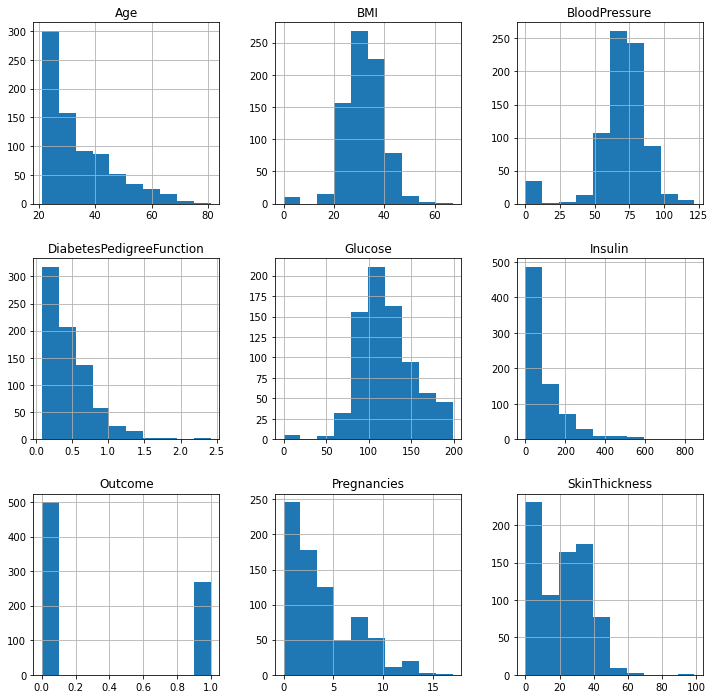

In [24]:
df.hist(figsize=(12,12));

&lt;seaborn.axisgrid.PairGrid at 0x7fc46385adf0&gt;

&lt;Figure size 720x720 with 0 Axes&gt;

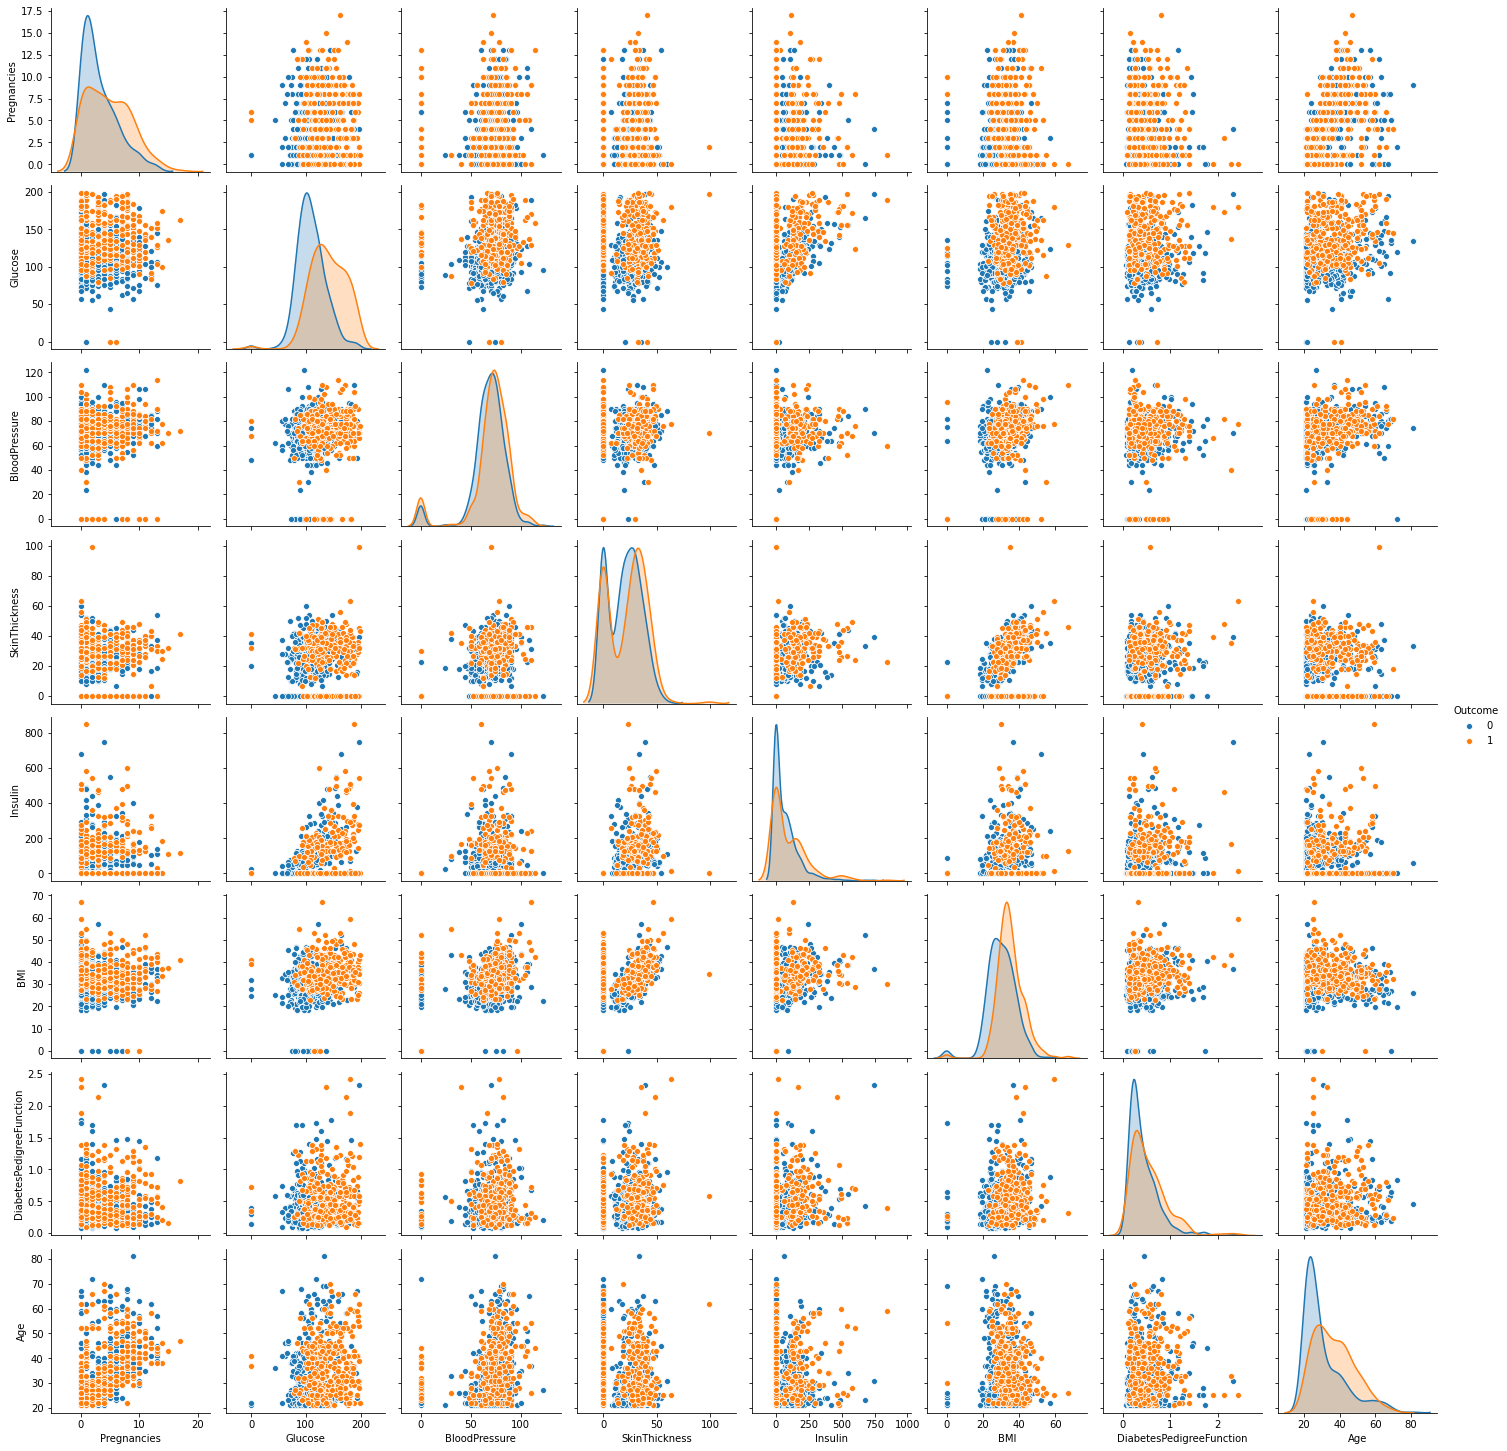

In [26]:
plt.figure(figsize=(10,10))
sns.pairplot(df,hue='Outcome')

 #Feature Engineering

In [33]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fc4571bc820&gt;

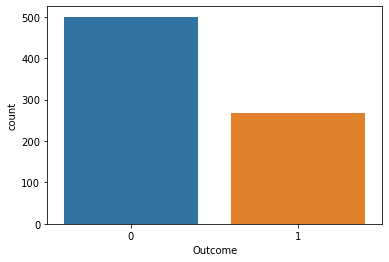

In [35]:
sns.countplot(df.Outcome)
# unbalanced data

In [36]:
df.columns

Index([&#39;Pregnancies&#39;, &#39;Glucose&#39;, &#39;BloodPressure&#39;, &#39;SkinThickness&#39;, &#39;Insulin&#39;,
       &#39;BMI&#39;, &#39;DiabetesPedigreeFunction&#39;, &#39;Age&#39;, &#39;Outcome&#39;],
      dtype=&#39;object&#39;)

In [68]:
X=df.drop('Outcome',axis=1)
y=df.Outcome

In [69]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [50]:
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
log_clf= LogisticRegression()
rnd_clf = RandomForestClassifier()
Knn_clf = KNeighborsClassifier()
xgb_clf = XGBClassifier()
gbr_clf=GradientBoostingClassifier ()
ada_clf=AdaBoostClassifier()

In [72]:
from sklearn.impute import SimpleImputer
#impute with mean all 0 readings

fill = SimpleImputer(missing_values = 0 , strategy ="mean")

X_train = fill.fit_transform(X_train)
X_test = fill.fit_transform(X_test)

In [114]:
def FitModel(X_train,y_train,X_test,y_test,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
   
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(X_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test)
    cm = confusion_matrix(y_test, pred)
   # metrics =grid_result.gr
    #print(pred)
    pickle.dump(grid_result,open('Random Forest.pkl','wb'))
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    sns.heatmap(cm,annot=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
Best Params : {&#39;C&#39;: 2.7825594022071245, &#39;penalty&#39;: &#39;l2&#39;}
Classification Report :               precision    recall  f1-score   support

           0       0.75      0.93      0.83        95
           1       0.81      0.51      0.62        59

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154

Accuracy Score : 0.7662337662337663


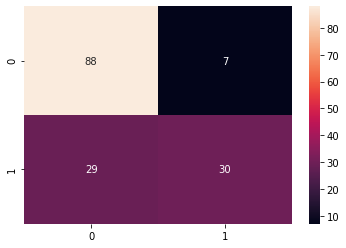

In [66]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_train,y_train,X_test,y_test,'LogisticRegression',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1266 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  2.4min finished
Best Params : {&#39;learning_rate&#39;: 0.060000000000000005, &#39;max_depth&#39;: 2, &#39;n_estimators&#39;: 100}
Classification Report :               precision    recall  f1-score   support

           0       0.75      0.87      0.81        95
           1       0.73      0.54      0.62        59

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

Accuracy S

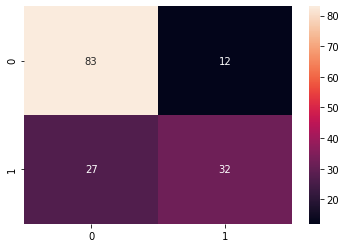

In [76]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
            'max_depth' :[2,3,4,5,6,7],
    'learning_rate':np.arange(0.01,0.1,0.01).tolist()
           
        }

FitModel(X_train,y_train,X_test,y_test,'XGBoost',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   12.1s finished
Best Params : {&#39;n_estimators&#39;: 1500}
Classification Report :               precision    recall  f1-score   support

           0       0.75      0.86      0.80        95
           1       0.70      0.53      0.60        59

    accuracy                           0.73       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.73      0.73      0.72       154

Accuracy Score : 0.7337662337662337


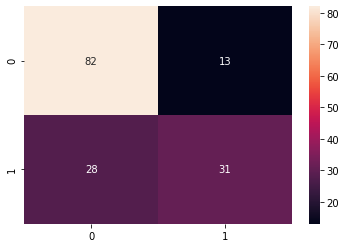

In [77]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
           
        }
FitModel(X_train,y_train,X_test,y_test,'Random Forest',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 140 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.4s finished
Best Params : {&#39;C&#39;: 1, &#39;gamma&#39;: 0.0001}
Classification Report :               precision    recall  f1-score   support

           0       0.71      0.91      0.80        95
           1       0.73      0.41      0.52        59

    accuracy                           0.71       154
   macro avg       0.72      0.66      0.66       154
weighted avg       0.72      0.71      0.69       154

Accuracy Score : 0.7142857142857143


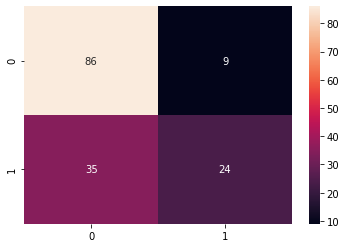

In [78]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModel(X_train,y_train,X_test,y_test,'SVC',SVC(),param,cv=5)

# Balance the data and check for the difference 

In [79]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [82]:
from imblearn.over_sampling import SMOTE

In [84]:
sm = SMOTE(random_state=42)
X_bal ,y_bal = sm.fit_resample(X,y)
pd.Series(y_bal).value_counts()

1    500
0    500
Name: Outcome, dtype: int64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fc457682220&gt;

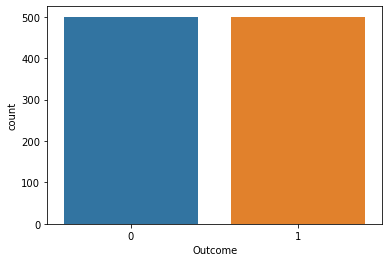

In [85]:
sns.countplot(y_bal)

In [87]:
X_train , X_test , y_train , y_test = train_test_split(X_bal ,y_bal ,test_size = 0.20, random_state = 10)

print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 800
Test Set : 200
Training labels : 800
Test Labels : 200


In [88]:
y_test.value_counts()

1    107
0     93
Name: Outcome, dtype: int64

In [90]:
fill = SimpleImputer(missing_values = 0 , strategy ="mean")

X_train = fill.fit_transform(X_train)
X_test = fill.fit_transform(X_test)

# Logistic Regression - After Over sampling

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
Best Params : {&#39;C&#39;: 1291.5496650148827, &#39;penalty&#39;: &#39;l2&#39;}
Classification Report :               precision    recall  f1-score   support

           0       0.72      0.81      0.76        93
           1       0.81      0.73      0.77       107

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200

Accuracy Score : 0.765


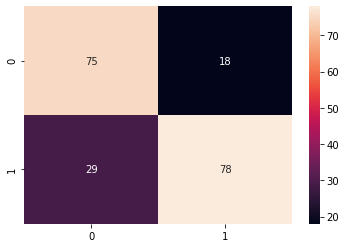

In [91]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_train,y_train,X_test,y_test,'LogisticRegression',LogisticRegression(),hyperparameters,cv=5)

##XgBoost - After Over sampling

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  3.2min finished
Best Params : {&#39;learning_rate&#39;: 0.02, &#39;max_depth&#39;: 7, &#39;n_estimators&#39;: 1000}
Classification Report :               precision    recall  f1-score   support

           0       0.81      0.75      0.78        93
           1       0.80      0.85      0.82       107

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200

Accuracy Score : 0.805


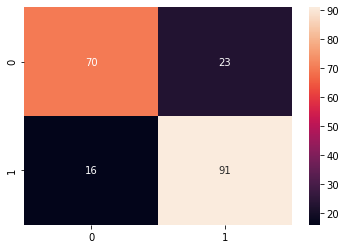

In [92]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
            'max_depth' :[2,3,4,5,6,7],
    'learning_rate':np.arange(0.01,0.1,0.01).tolist()
           
        }

FitModel(X_train,y_train,X_test,y_test,'XGBoost',XGBClassifier(),param,cv=5)

In [115]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
           
        }
FitModel(X_train,y_train,X_test,y_test,'Random Forest',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
exception calling callback for &lt;Future at 0x7fc4591372e0 state=finished raised TerminatedWorkerError&gt;
Traceback (most recent call last):
  File &quot;/Users/temitope/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/_base.py&quot;, line 625, in _invoke_callbacks
    callback(self)
  File &quot;/Users/temitope/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py&quot;, line 347, in __call__
    self.parallel.dispatch_next()
  File &quot;/Users/temitope/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py&quot;, line 780, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File &quot;/Users/temitope/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py&quot;, line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File &quot;/Users/temitope/opt/anaconda3/lib/python3.8/site-package

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGABRT(-6)}

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 125 out of 140 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.0s finished
Best Params : {&#39;C&#39;: 1000, &#39;gamma&#39;: 0.005}
Classification Report :               precision    recall  f1-score   support

           0       0.69      0.81      0.75        93
           1       0.80      0.69      0.74       107

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200

Accuracy Score : 0.745


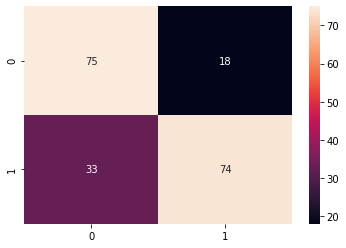

In [94]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModel(X_train,y_train,X_test,y_test,'SVC',SVC(),param,cv=5)

# Random Forest  - After Over sampling

In [113]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
           
        }
FitModel(X_train,y_train,X_test,y_test,'Random Forest',RandomForestClassifier(),param,cv=10)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGABRT(-6)}

# SVC - After Over sampling

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 125 out of 140 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.1s finished
Best Params : {&#39;C&#39;: 1000, &#39;gamma&#39;: 0.005}
Classification Report :               precision    recall  f1-score   support

           0       0.69      0.81      0.75        93
           1       0.80      0.69      0.74       107

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200

Accuracy Score : 0.745


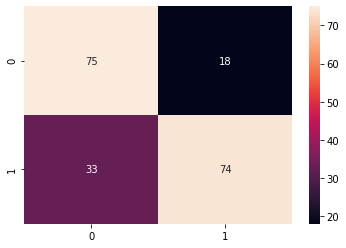

In [96]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModel(X_train,y_train,X_test,y_test,'SVC',SVC(),param,cv=5)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished
Best Params : {&#39;n_neighbors&#39;: 2}
Classification Report :               precision    recall  f1-score   support

           0       0.68      0.74      0.71        93
           1       0.76      0.70      0.73       107

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

Accuracy Score : 0.72


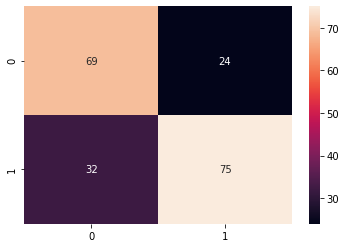

In [99]:
param ={
            'n_neighbors': [2,4],
           
        }
FitModel(X_train,y_train,X_test,y_test,'knn',KNeighborsClassifier(),param,cv=5)